In [1]:
import numpy as np, pandas as pd, seaborn as sns, sklearn


### load the tips dataset

#### KNN - CLASSIFIER

In [2]:
df=sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


* there is no missing value

### checking which column is connected with target column,target column is tip

<AxesSubplot:xlabel='tip', ylabel='total_bill'>

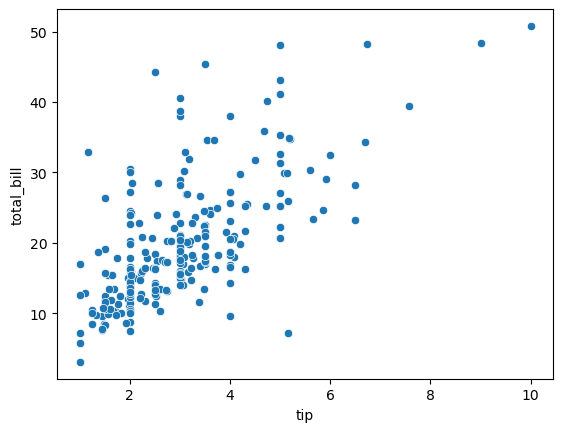

In [4]:
sns.scatterplot(x=df["tip"],y=df["total_bill"])

<AxesSubplot:xlabel='tip', ylabel='sex'>

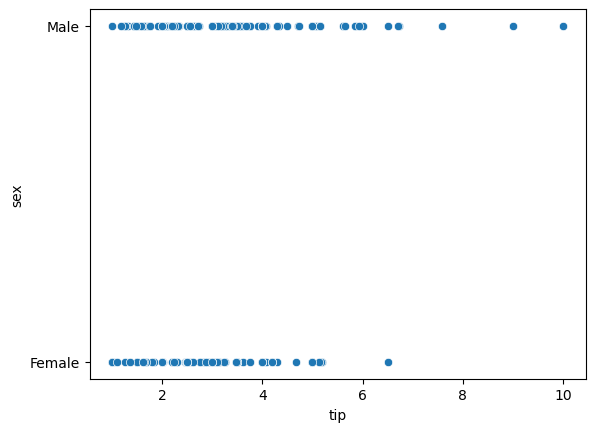

In [5]:
sns.scatterplot(x=df["tip"],y=df["sex"])

<AxesSubplot:xlabel='tip', ylabel='day'>

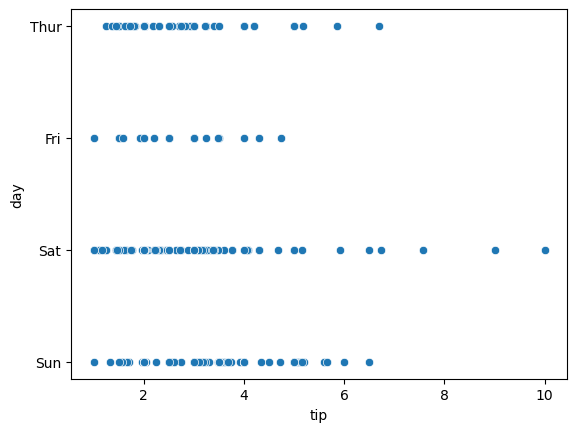

In [6]:
sns.scatterplot(x=df["tip"],y=df["day"])

<AxesSubplot:xlabel='tip', ylabel='size'>

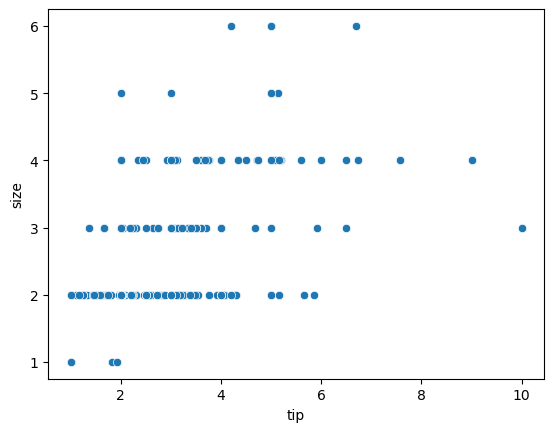

In [7]:
sns.scatterplot(x=df["tip"],y=df["size"])

<AxesSubplot:xlabel='tip', ylabel='time'>

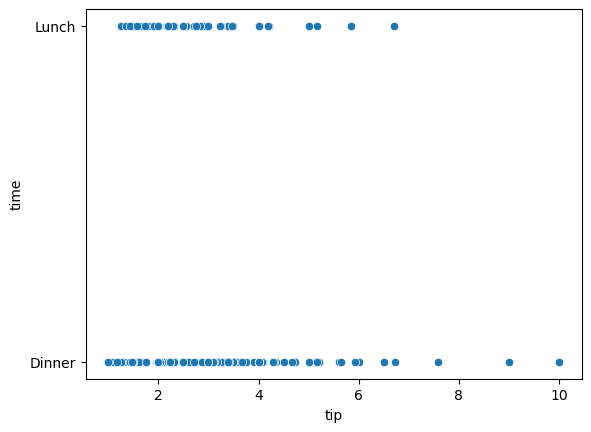

In [8]:
sns.scatterplot(x=df["tip"],y=df["time"])

<AxesSubplot:xlabel='tip', ylabel='smoker'>

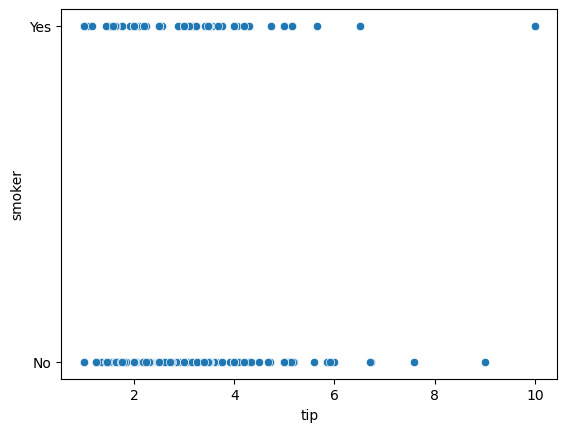

In [9]:
sns.scatterplot(x=df["tip"],y=df["smoker"])

### separate predicting column and target column

In [10]:
X=df[["total_bill","sex","smoker","day","time","size"]]
Y=df["tip"]

### split the data into train and test

In [11]:
from sklearn.model_selection import train_test_split


xTrain, xTest, yTrain, yTest = train_test_split(X,Y,
                                                test_size = 0.32,
                                                random_state = 23)

In [12]:
xTrain.shape, xTest.shape, len(yTrain), len(yTest)

((165, 6), (79, 6), 165, 79)

In [13]:
contCols = ['total_bill']
nominalcatCols = ['sex', 'smoker','time',"day"]
ordinalCols = ['size']

### applying pipeline and ColumnTransformer

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [15]:
# pipeline for handling cont data
# we also know the distributions of these cols are not normal
from sklearn.preprocessing import StandardScaler, PowerTransformer

contPipeline = Pipeline(steps = [
    ('yeoJohnsonTransformation', PowerTransformer()),
    ('standardization', StandardScaler()) 
])

#### preprocessing

In [16]:
from sklearn.preprocessing import OneHotEncoder

nomcatPipeline = Pipeline(steps = [
    ('oneHotEncoding', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
])

In [17]:
from sklearn.preprocessing import OrdinalEncoder

ordcatPipeline = Pipeline(steps = [
    ('ordinalEncoding',OrdinalEncoder(categories=[[1,2,3,4,5,6]]))
])
    
                                       

In [18]:
preprocessor = ColumnTransformer(transformers = [
    ('contDataPipeLine', contPipeline, contCols),
    ('catNominalDataPipeLine', nomcatPipeline, nominalcatCols),
    ("catordinalDatapipeline",ordcatPipeline,ordinalCols)
    
],
remainder = 'passthrough')

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knnC = KNeighborsRegressor(n_neighbors=13)

knnCPipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('knnCModel', knnC)
])

In [20]:
knnCPipeline.fit(xTrain,yTrain)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('contDataPipeLine',
                                                  Pipeline(steps=[('yeoJohnsonTransformation',
                                                                   PowerTransformer()),
                                                                  ('standardization',
                                                                   StandardScaler())]),
                                                  ['total_bill']),
                                                 ('catNominalDataPipeLine',
                                                  Pipeline(steps=[('oneHotEncoding',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'smoker', 'time',
                                                   'day']),
                                                 ('catordinalDatapipeline',
                                                  Pipeline(steps=[('ordinalEncoding',
                                                                   OrdinalEncoder(categories=[[1,
                                                                                               2,
                                                                                               3,
                                                                                               4,
                                                                                               5,
                                                                                               6]]))]),
                                                  ['size'])])),
                ('knnCModel', KNeighborsRegressor(n_neighbors=13))])

In [21]:
yTrainPred=knnCPipeline.predict(xTrain)
yTestPred=knnCPipeline.predict(xTest)

In [22]:
from sklearn.metrics import r2_score as acs
acs(yTrain,yTrainPred),acs(yTest,yTestPred)

(0.47570808237050044, 0.31864790961053835)

### KNN-REGRESSION

In [46]:
df=sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [47]:
df.isnull().sum() 
# no null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

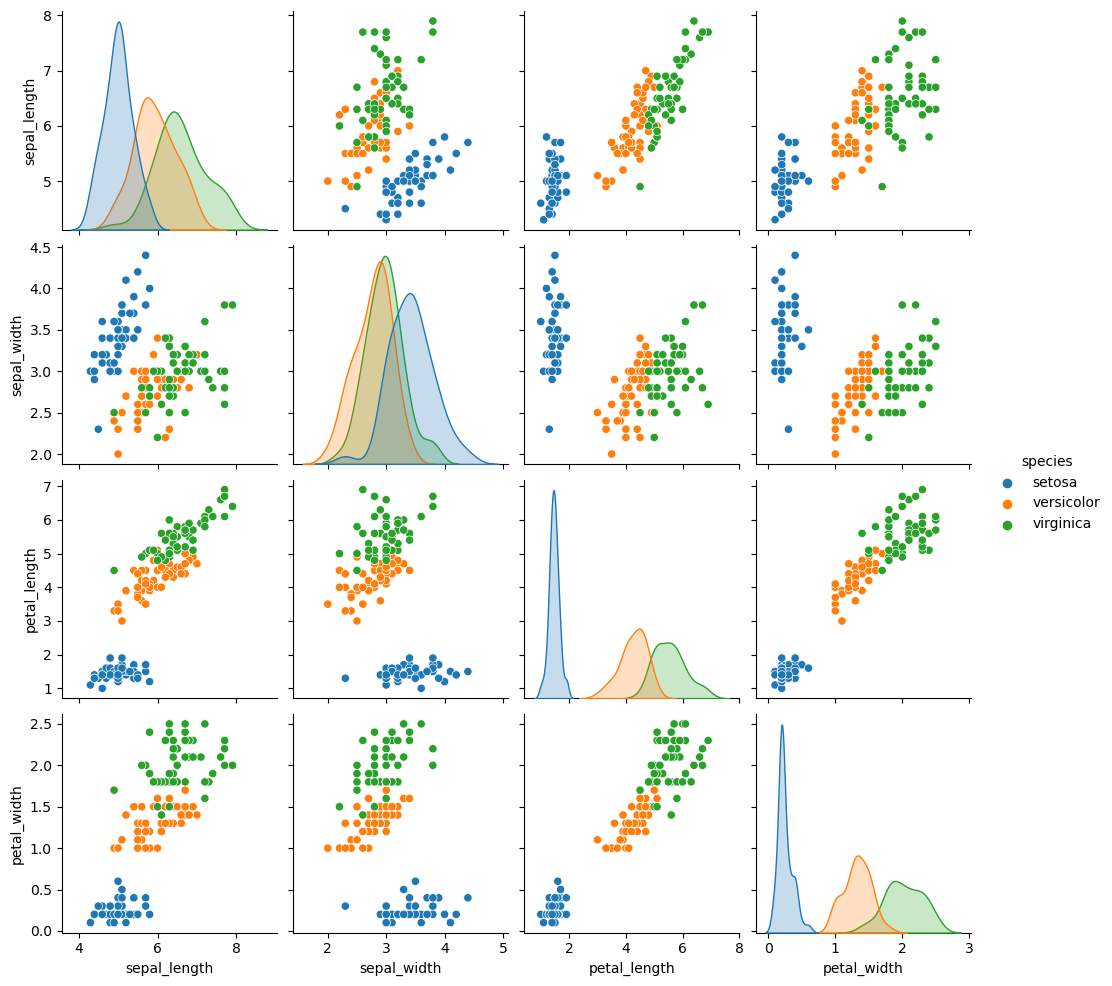

In [48]:
sns.pairplot(df,hue="species")

In [49]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### separate predicting column and target column

In [50]:
X=df[["sepal_length","sepal_width","petal_length","petal_width"]]
y=df["species"]

### split the data into train and test

In [51]:
xTrain,xTest,yTrain,yTest=train_test_split(X,y,
                                          test_size=0.24)

In [52]:
xTrain.shape,xTest.shape,len(yTrain),len(yTest)

((114, 4), (36, 4), 114, 36)

In [53]:
contindata=["sepal_length","sepal_width","petal_length","petal_width"]

### Pipeline for PreProcessing

In [54]:
from sklearn.preprocessing import PowerTransformer,StandardScaler
preprocess=Pipeline(steps=[
    ("Yeojohnson",PowerTransformer()),
    ("standardscalar",StandardScaler())
])
from sklearn.neighbors import KNeighborsClassifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knnC=KNeighborsClassifier(n_neighbors=11)
knncPipeline=Pipeline(steps=[
    ("preprocess",preprocess),
    ("knnR",knnC)
])

In [56]:
knncPipeline.fit(xTrain,yTrain)

Pipeline(steps=[('preprocess',
                 Pipeline(steps=[('Yeojohnson', PowerTransformer()),
                                 ('standardscalar', StandardScaler())])),
                ('knnR', KNeighborsClassifier(n_neighbors=11))])

In [57]:
yTrainPred=knncPipeline.predict(xTrain)
yTestPred=knncPipeline.predict(xTest)

In [61]:
from sklearn.metrics import accuracy_score as acs
acs(yTrain,yTrainPred),acs(yTest,yTestPred)

(0.956140350877193, 0.9722222222222222)

In [62]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [63]:
confusion_matrix(yTrain,yTrainPred)

array([[40,  0,  0],
       [ 0, 28,  4],
       [ 0,  1, 41]], dtype=int64)

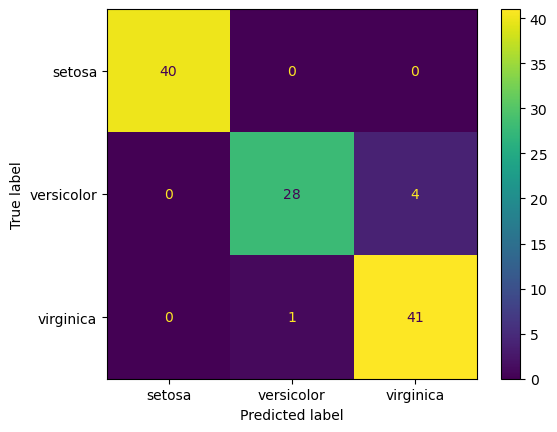

In [66]:
cmTrain=ConfusionMatrixDisplay(confusion_matrix(yTrain,yTrainPred),display_labels=knnC.classes_)
cmTrain.plot()

In [68]:
confusion_matrix(yTest,yTestPred)

array([[10,  0,  0],
       [ 0, 18,  0],
       [ 0,  1,  7]], dtype=int64)

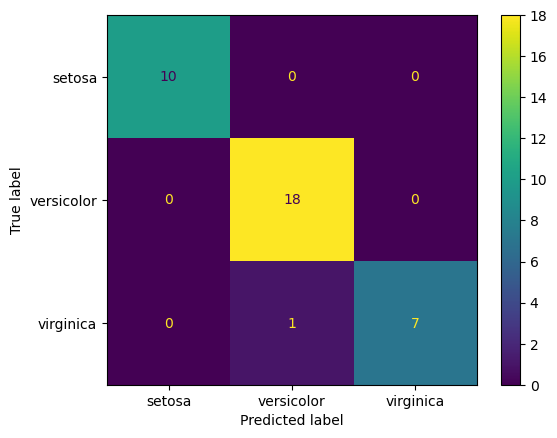

In [70]:
cmTest=ConfusionMatrixDisplay(confusion_matrix(yTest,yTestPred),display_labels=knnC.classes_)
cmTest.plot()